# <center> Predicting Credit Risk Defaulters </center>

## Problem Statement:

A mid-sized bank aims to identify customers who are likely to default on their loans within the next 6 months. Additionally, the bank wants to segment its customers for targeted marketing. The bank has provided customer data, including loan information, transaction history, and account details.

## Aim:

The project aims to provide actionable insights through predictive modeling and behavioral analysis to minimize default risk and optimize customer engagement.

## Introduction

Minimization of risks is one of the survival essentials of any bank.Inside the banking sector, credit risk warranty for financial safety in a profitable balance with no loss. Ability to predetermine potential bad debtors simply favors a boost to the big preemptive measures a bank will likely be enabled to undertake in reducing losses and cleaning up its portfolio. Customer segmentation creates various possibilities of capturing marketing campaigns, hence enhanced relationships and greater products offered through customer service.

Taking the help of loan, transaction, and account information, this case study involves unearthing valuable patterns and trends present in customer data. Our target objectives via exploratory data analysis and predictive modeling are as follow

-  Predict the likelihood of loan defaults.
-  
Segment customers for personalized marketing efforts
-  
Derive actionable insights to improve customer management and risk mitigation.s:

## Dataset Description

This dataset consists of customer details, primarily used to predict loan default status. The target variable for this analysis is `Credit_Default_Status`, where:
- **0** indicates the customer did not default.
- **1** indicates the customer defaulted.

### Features:
1. **Customer_ID**: Unique identifier for each customer.
2. **Age**: Age of the customer.
3. **Gender**: Gender of the customer (e.g., Male, Female).
4. **Income**: The annual income of the customer.
5. **Credit_Score**: A numerical value representing the customer's creditworthiness.
6. **Loan_Amount**: The total loan amount taken by the customer.
7. **Loan_Term**: The duration of the loan (in months).
8. **Number_of_Loans**: The total number of loans the customer has taken.
9. **Transaction_Count**: The number of transactions made by the customer.
10. **Account_Balance**: The customer's bank account balance.
11. **Marital_Status**: Marital status of the customer (e.g., Married, Divorced, Unmarried).
12. **Credit_Default_Status**: The target variable indicating whether the customer defaulted (1) or not (0).
13. **Job**: Job category of the customer (e.g., Other, IT Professional).

### Sample Data:
The following table shows a small sample of the data:
<table>
  <thead>
    <tr>
      <th>Customer_ID</th>
      <th>Age</th>
      <th>Gender</th>
      <th>Income</th>
      <th>Credit_Score</th>
      <th>Loan_Amount</th>
      <th>Loan_Term</th>
      <th>Number_of_Loans</th>
      <th>Transaction_Count</th>
      <th>Account_Balance</th>
      <th>Marital_Status</th>
      <th>Credit_Default_Status</th>
      <th>Job</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>69</td>
      <td>Male</td>
      <td>37114</td>
      <td>678</td>
      <td>4905.22</td>
      <td>12</td>
      <td>1</td>
      <td>18</td>
      <td>3836.25</td>
      <td>married</td>
      <td>0</td>
      <td>Other</td>
    </tr>
    <tr>
      <td>2</td>
      <td>98</td>
      <td>Male</td>
      <td>-49215</td>
      <td>778</td>
      <td>6374.88</td>
      <td>12</td>
      <td>3</td>
      <td>4</td>
      <td>5300.84</td>
      <td>unmarried</td>
      <td>0</td>
      <td>Other</td>
    </tr>
    <tr>
      <td>3</td>
      <td>60</td>
      <td>Female</td>
      <td>34352</td>
      <td>696</td>
      <td>6622.15</td>
      <td>36</td>
      <td>5</td>
      <td>8</td>
      <td>5668.57</td>
      <td>married</td>
      <td>0</td>
      <td>Other</td>
    </tr>
    <tr>
      <td>4</td>
      <td>51</td>
      <td>Male</td>
      <td>121193</td>
      <td>655</td>
      <td>25610.96</td>
      <td>24</td>
      <td>2</td>
      <td>10</td>
      <td>9202.42</td>
      <td>divorced</td>
      <td>0</td>
      <td>Other</td>
    </tr>
    <tr>
      <td>5</td>
      <td>46</td>
      <td>Female</td>
      <td>115249</td>
      <td>702</td>
      <td>22509.28</td>
      <td>72</td>
      <td>5</td>
      <td>13</td>
      <td>8138.34</td>
      <td>married</td>
      <td>0</td>
      <td>Other</td>
    </tr>
  </tbody>
</table>


### Observations:
- The dataset provides both financial and personal information of the customers.
- The target variable, `Credit_Default_Status`, helps in determining whether a customer is likely to default on their loan.
- Various numerical and categorical features such as `Income`, `Age`, `Credit_Score`, `Loan_Amount`, and `Job` help to predict defaults.


## Analysis:

### Importing Packages

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import joblib
import pickle

### Data Info

In [53]:
data = pd.read_csv(r"C:\Users\mchar\Downloads\Data Science Internship Case Study Assessment\Data.csv")

In [55]:
data.head(10)

,Customer_ID,Age,Gender,Income,Credit_Score,Loan_Amount,Loan_Term,Number_of_Loans,Transaction_Count,Account_Balance,Marital_Status,Credit_Default_Status,Job
0,1,69,Male,37114,678,4905.22,12,1,18,3836.25,married,0,Other
1,2,98,Male,-49215,778,6374.88,12,3,4,5300.84,unmarried,0,Other
2,3,60,Female,34352,696,6622.15,36,5,8,5668.57,married,0,Other
3,4,51,Male,121193,655,25610.96,24,2,10,9202.42,divorced,0,Other
4,5,46,Female,115249,702,22509.28,72,5,13,8138.34,married,0,Other
5,6,97,Female,62479,533,11262.37,72,4,0,1559.15,married,1,Other
6,7,24,Male,34224,763,8858.11,12,5,21,6584.89,unmarried,0,Other
7,8,54,Female,98236,480,34270.35,36,2,3,2260.55,married,1,Other
8,9,46,Female,60480,718,22461.11,12,5,9,6025.93,unmarried,0,IT Professional
9,10,30,Male,104003,677,12096.57,60,5,6,5864.46,divorced,0,Other


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 4728 non-null   object 
 3   Income                 5000 non-null   int64  
 4   Credit_Score           5000 non-null   int64  
 5   Loan_Amount            4695 non-null   float64
 6   Loan_Term              5000 non-null   int64  
 7   Number_of_Loans        5000 non-null   int64  
 8   Transaction_Count      5000 non-null   int64  
 9   Account_Balance        5000 non-null   float64
 10  Marital_Status         4702 non-null   object 
 11  Credit_Default_Status  5000 non-null   int64  
 12  Job                    5000 non-null   object 
dtypes: float64(2), int64(8), object(3)
memory usage: 507.9+ KB


In [59]:
data.describe()

,Customer_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Number_of_Loans,Transaction_Count,Account_Balance,Credit_Default_Status
count,5000.000000,5000.000000,5000.000000,5000.000000,4695.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,41.241200,64121.831800,652.243400,16545.320735,42.028800,3.010000,11.182800,7136.766706,0.220000
std,1443.520003,15.759629,30845.717505,128.409233,9644.842666,20.423188,1.428954,7.319378,5016.282889,0.414288
min,1.000000,18.000000,-88718.000000,300.000000,-12063.540000,12.000000,1.000000,0.000000,219.890000,0.000000
25%,1250.750000,26.000000,40592.000000,612.000000,9566.770000,24.000000,2.000000,5.000000,3379.782500,0.000000
50%,2500.500000,41.000000,53917.500000,679.000000,14022.940000,36.000000,3.000000,10.000000,5974.010000,0.000000
75%,3750.250000,54.000000,88177.000000,736.000000,21417.675000,60.000000,4.000000,17.000000,9550.302500,0.000000
max,5000.000000,103.000000,139870.000000,850.000000,53761.810000,72.000000,5.000000,25.000000,27058.500000,1.000000


 The dataset contains 5,000 entries across 13 columns. Missing values in Gender (272), Loan_Amount (305), and Marital_Status (298) were handled using probabilistic imputation, ensuring a robust and realistic approach to data preparation.


### Data Preprocessing

#### Gender 

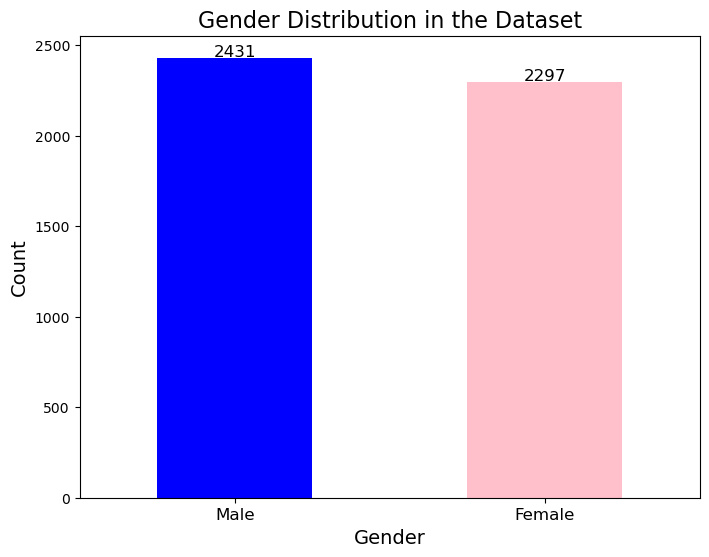

In [64]:
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
bar_plot = gender_counts.plot(kind='bar', color=['blue', 'pink'])

for index, value in enumerate(gender_counts):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)

plt.title('Gender Distribution in the Dataset', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.show()

The bar plot reveals that the dataset contains 2,431 male and 2,297 female entries, with 272 missing values for the gender attribute. 

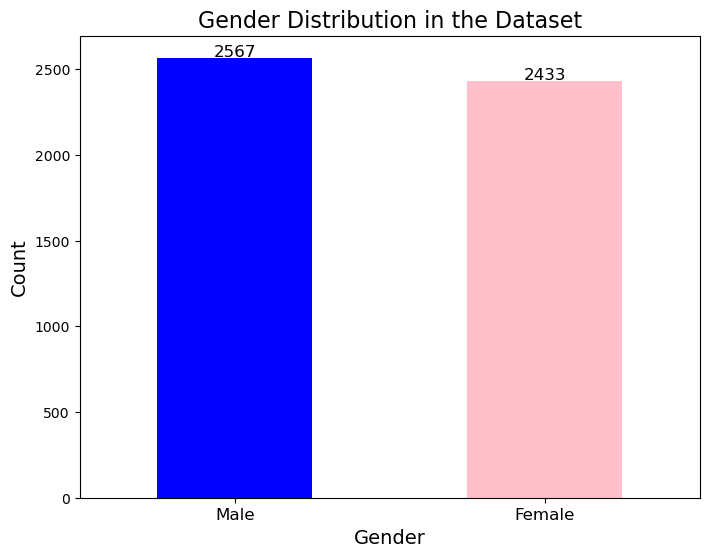

In [67]:
probabilities = [2431 / (2431 + 2297), 2297 / (2431 + 2297)]
data['Gender'] = data['Gender'].apply(
    lambda x: np.random.choice(['Male', 'Female'], p=probabilities) if pd.isnull(x) else x
)
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
bar_plot = gender_counts.plot(kind='bar', color=['blue', 'pink'])

for index, value in enumerate(gender_counts):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)
plt.title('Gender Distribution in the Dataset', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.show()


To address the missing values in the gender column, we employed a probability-based imputation method. Probabilities were calculated based on the existing gender distribution, with males accounting for approximately 51.4% and females for 48.6% of the non-missing data.

Missing values were filled by randomly assigning genders ('Male' or 'Female') in accordance with these probabilities. The updated gender distribution was then visualized using a bar plot, which shows the count of each gender after imputation. Counts were annotated on the bars for clarity, and the plot confirms that the imputation process preserved the original distribution proportions.

#### Marital Status

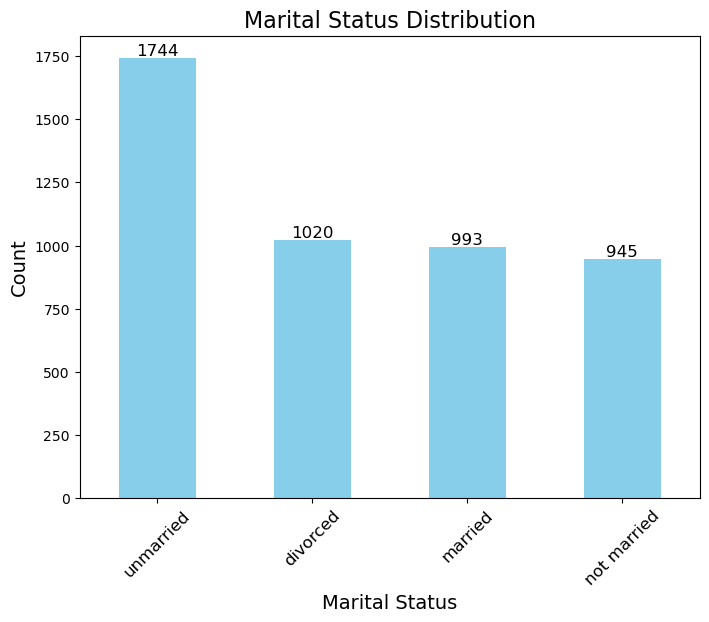

In [71]:
marital_status_counts = data['Marital_Status'].value_counts()
plt.figure(figsize=(8, 6))
marital_status_counts.plot(kind='bar', color='skyblue')
plt.title('Marital Status Distribution', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
for index, value in enumerate(marital_status_counts):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)

plt.xticks(rotation=45, fontsize=12)
plt.show()

The bar plot illustrates the distribution of marital status within the dataset, showing the following counts for each category: Unmarried with 1,744 entries (the highest count), Divorced with 1,020 entries, Married with 993 entries, and Not Married with 945 entries. The plot highlights that the majority of customers are unmarried, while the other categories show a relatively balanced distribution. This information can be useful for understanding customer segments and informing strategies related to marketing or financial planning. The values are clearly annotated on the bars, making the data easy to interpret.

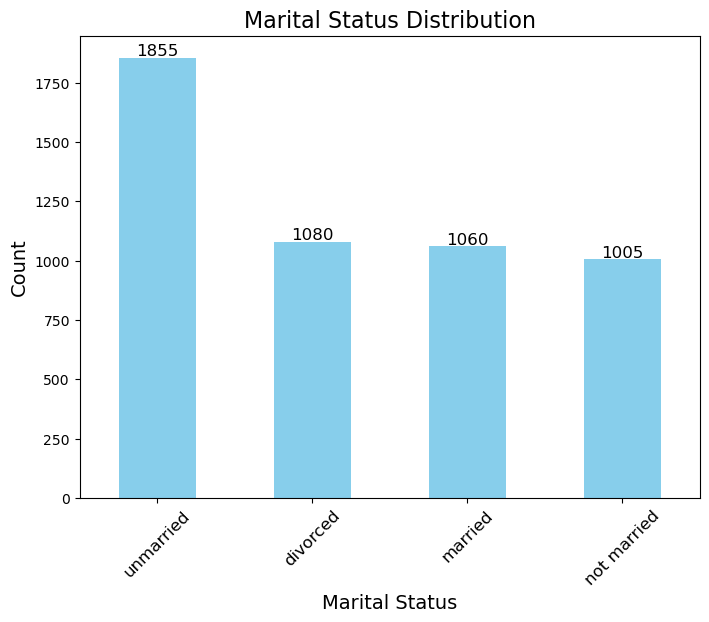

In [74]:
total = 1744 + 1020 + 993 + 945
probabilities = {
    'unmarried': 1744 / total,
    'divorced': 1020 / total,
    'married': 993 / total,
    'not married': 945 / total
}
data['Marital_Status'] = data['Marital_Status'].apply(
    lambda x: np.random.choice(['unmarried', 'divorced', 'married', 'not married'], 
                               p=list(probabilities.values())) if pd.isnull(x) else x
)

marital_status_counts = data['Marital_Status'].value_counts()
plt.figure(figsize=(8, 6))
marital_status_counts.plot(kind='bar', color='skyblue')
plt.title('Marital Status Distribution', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Count', fontsize=14)


for index, value in enumerate(marital_status_counts):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)

plt.xticks(rotation=45, fontsize=12)
plt.show()

The bar plot shows the distribution of marital status in the dataset, with missing values filled based on the data's probabilities. It clearly illustrates the count for each category, with labels for easy interpretation. The plot provides a clear view of the marital status distribution.

#### Loan Amount

In [78]:
data['Loan_Amount'] = data['Loan_Amount'].fillna(data['Loan_Amount'].median())

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   Income                 5000 non-null   int64  
 4   Credit_Score           5000 non-null   int64  
 5   Loan_Amount            5000 non-null   float64
 6   Loan_Term              5000 non-null   int64  
 7   Number_of_Loans        5000 non-null   int64  
 8   Transaction_Count      5000 non-null   int64  
 9   Account_Balance        5000 non-null   float64
 10  Marital_Status         5000 non-null   object 
 11  Credit_Default_Status  5000 non-null   int64  
 12  Job                    5000 non-null   object 
dtypes: float64(2), int64(8), object(3)
memory usage: 507.9+ KB


#### Removing Negative Values

In [83]:
print("Negative Income Count:", data[data['Income'] <= 0].shape[0])
print("Negative Loan_Amount Count:", data[data['Loan_Amount'] <= 0].shape[0])

Negative Income Count: 114
Negative Loan_Amount Count: 12


In [85]:
data = data[(data['Income'] > 0) & (data['Loan_Amount'] > 0)]

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4874 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            4874 non-null   int64  
 1   Age                    4874 non-null   int64  
 2   Gender                 4874 non-null   object 
 3   Income                 4874 non-null   int64  
 4   Credit_Score           4874 non-null   int64  
 5   Loan_Amount            4874 non-null   float64
 6   Loan_Term              4874 non-null   int64  
 7   Number_of_Loans        4874 non-null   int64  
 8   Transaction_Count      4874 non-null   int64  
 9   Account_Balance        4874 non-null   float64
 10  Marital_Status         4874 non-null   object 
 11  Credit_Default_Status  4874 non-null   int64  
 12  Job                    4874 non-null   object 
dtypes: float64(2), int64(8), object(3)
memory usage: 533.1+ KB


### Customer Demographics Analysis

In [14]:
data['Credit_Default_Status'] = data['Credit_Default_Status'].map({0: 'Non-Default', 1: 'Default'})

#### Age Distribution Analysis

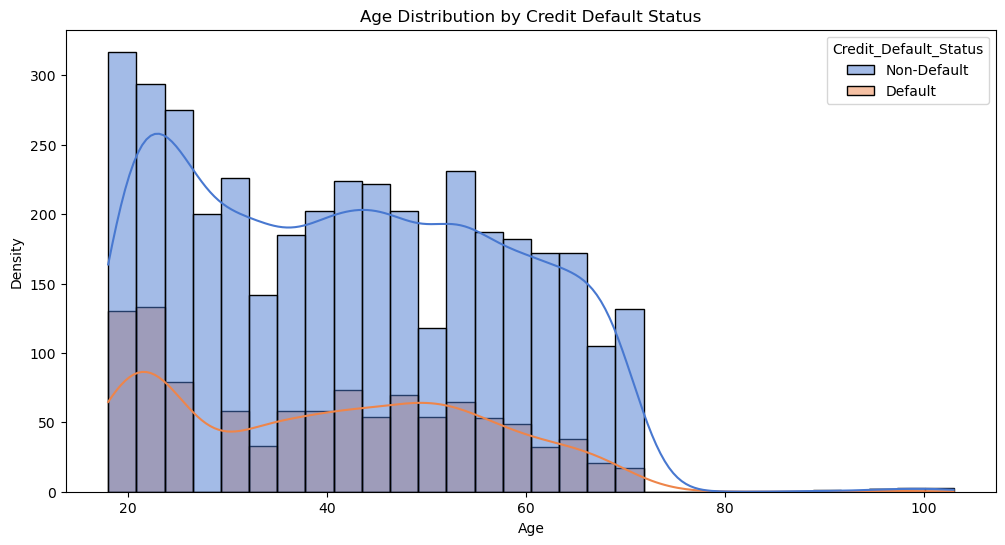

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='Credit_Default_Status', kde=True, bins=30, palette='muted')
plt.title('Age Distribution by Credit Default Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

The distribution of both Defaulters and Non-Defaulters' age shows a positive skew, indicating that most individuals in both groups are clustered towards the younger age range. The overall shape of the distributions for both groups is quite similar, suggesting that age does not play a major distinguishing factor between those who default and those who do not. However, the skewness could still provide insights into trends among specific age groups.

#### Income Analysis

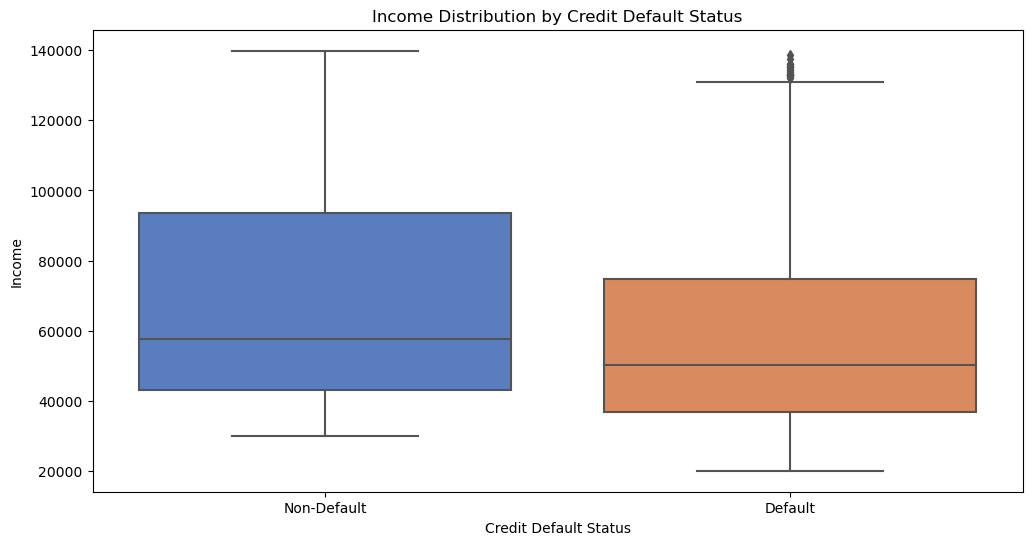

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Credit_Default_Status', y='Income', palette='muted')
plt.title('Income Distribution by Credit Default Status')
plt.xlabel('Credit Default Status')
plt.ylabel('Income')
plt.show()

From the above box plot, it is evident that around 50% of Non-Defaulter’s incomes lie between 50,000 and 90,000, indicating a relatively higher income range for this group. In contrast, Defaulters tend to have a lower income, with 50% of their incomes falling between 40,000 and 70,000. This suggests that lower-income individuals are more likely to default, which could be an important factor in predicting credit default status.

#### Occupation Analysis

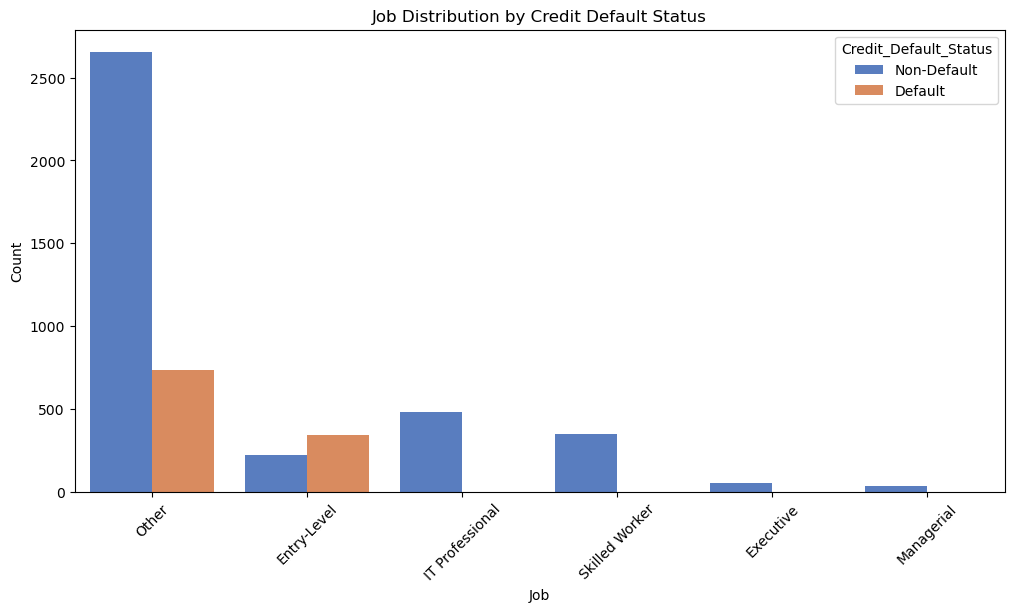

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Job', hue='Credit_Default_Status', palette='muted', order=data['Job'].value_counts().index)
plt.title('Job Distribution by Credit Default Status')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the above countplot, we can observe that Defaulters are predominantly found in Entry Level jobs and other miscellaneous categories. Interestingly, there are no Defaulters in the IT Professional, Skilled Worker, or Executive and Managerial job categories. This suggests that individuals in higher-skilled or managerial positions tend to have a lower likelihood of defaulting, which could be indicative of better financial stability in these job roles.

#### Gender Analysis

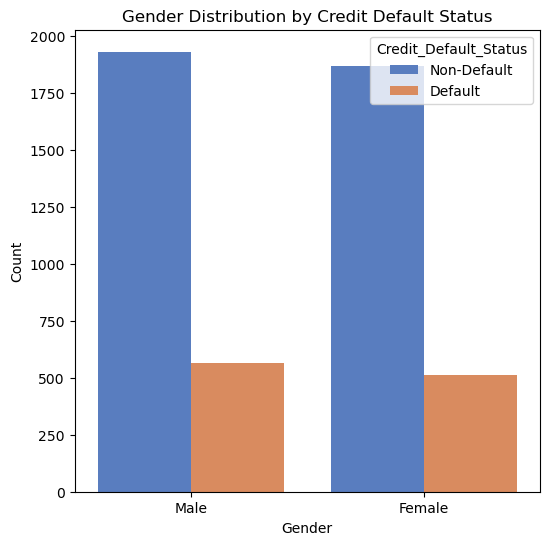

In [18]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='Gender', hue='Credit_Default_Status', palette='muted')
plt.title('Gender Distribution by Credit Default Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

From the above countplot, it is evident that gender does not have a significant impact on the likelihood of defaulting, as the count of Defaulters in both males and females is nearly identical. This suggests that, in this dataset, the probability of default is not strongly influenced by gender, and other factors, such as income, job type, or credit score, may play a more critical role in determining the likelihood of a loan default.

#### Marital Status Analysis

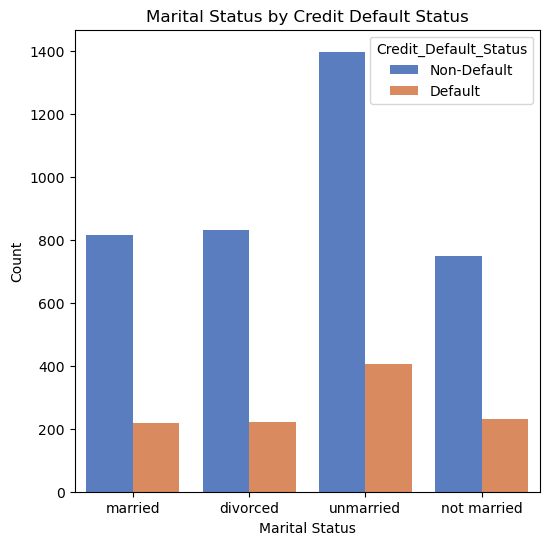

In [19]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='Marital_Status', hue='Credit_Default_Status', palette='muted')
plt.title('Marital Status by Credit Default Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

From the above countplot, it is clear that Defaulters are predominantly from the unmarried marital status group, with a noticeably higher count compared to the married, divorced, and other marital status categories. This suggests that individuals who are unmarried may be at a higher risk of defaulting on loans, possibly due to factors like financial instability or lower income levels, which may warrant further investigation.

#### Observing numeric summaries grouped by Credit Default Status

In [20]:
demo_summary = data.groupby('Credit_Default_Status')[['Age', 'Income', 'Loan_Amount']].mean()
print("\nSummary Statistics by Credit Default Status:\n", demo_summary)


Summary Statistics by Credit Default Status:
                              Age        Income   Loan_Amount
Credit_Default_Status                                       
Default                39.688951  57821.144847  14408.586453
Non-Default            41.800105  68087.357651  17032.052602


#### Calculate average loan amount and loan term grouped by Credit Default Status

In [21]:
loan_analysis = data.groupby('Credit_Default_Status')[['Loan_Amount', 'Loan_Term']].mean()
print("\nAverage Loan Amount and Term by Credit Default Status:\n")
print(loan_analysis)


Average Loan Amount and Term by Credit Default Status:

                        Loan_Amount  Loan_Term
Credit_Default_Status                         
Default                14408.586453  42.128134
Non-Default            17032.052602  42.052146


### Transcations and Balance Anaylsis

#### Transaction count analysis

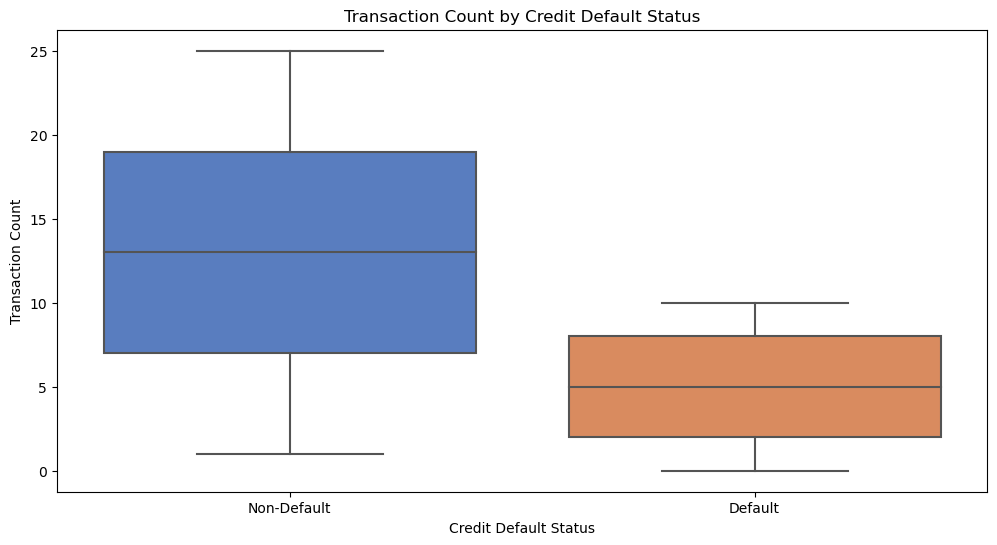

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Credit_Default_Status', y='Transaction_Count', palette='muted')
plt.title('Transaction Count by Credit Default Status')
plt.xlabel('Credit Default Status')
plt.ylabel('Transaction Count')
plt.show()

The graph reveals an interesting trend when comparing the Non-Default and Default cases in relation to transaction count. In the Non-Default scenario, approximately 50% of the transaction counts fall between the range of 7 and 18, indicating a higher level of financial activity. On the other hand, in the Default case, 50% of the transaction counts are concentrated between 0 and 10, suggesting fewer transactions and possibly lower engagement with the financial system. From this, we can infer that transaction count plays a significant role in determining the likelihood of default. Specifically, individuals with a higher transaction count are more likely to return the borrowed amount, suggesting a stronger financial behavior or commitment. This suggests that monitoring transaction frequency can serve as a valuable predictor for assessing creditworthiness and minimizing default risks.

#### Account Balance Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


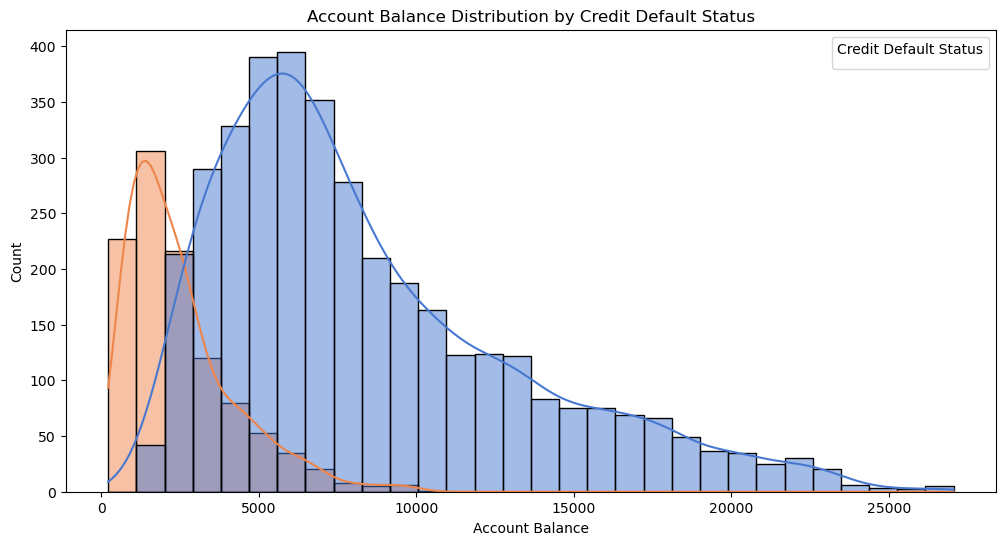

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Account_Balance', hue='Credit_Default_Status', kde=True, bins=30, palette='muted')
plt.title('Account Balance Distribution by Credit Default Status')
plt.xlabel('Account Balance')
plt.ylabel('Count')
plt.legend(title='Credit Default Status')
plt.show()


Both the Default and Non-Default distributions show a positive skew, with most values concentrated at the lower end. As the account balance increases, the likelihood of an individual being classified as a non-defaulter also rises, indicating that a higher account balance is a strong indicator of financial reliability and reduces the chances of default.

#### Joint Analysis of Transaction Count and Account Balance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


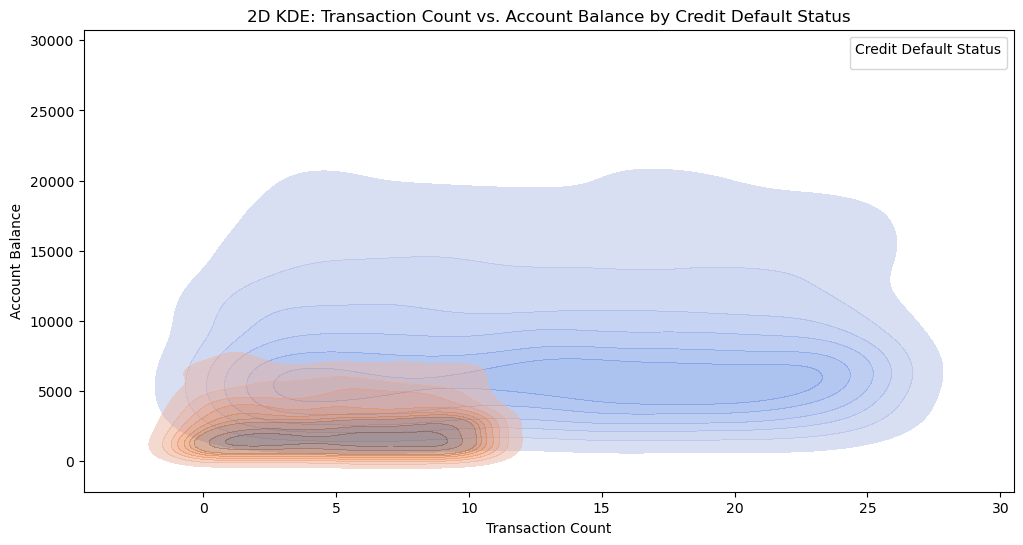

In [24]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='Transaction_Count', y='Account_Balance', hue='Credit_Default_Status', fill=True, alpha=0.5, palette='muted')
plt.title('2D KDE: Transaction Count vs. Account Balance by Credit Default Status')
plt.xlabel('Transaction Count')
plt.ylabel('Account Balance')
plt.legend(title='Credit Default Status')
plt.show()


In the joint analysis of Transaction Count and Account Balance, we observe that the density of defaulters is higher in the south-western region of the graph. This indicates that individuals who default tend to have both low account balances and low transaction counts. Thus, low values in both features serve as strong indicators of a higher likelihood of default.

#### Summary Statistics

In [25]:
transaction_balance_summary = data.groupby('Credit_Default_Status')[['Transaction_Count', 'Account_Balance']].mean()
print("\nSummary Statistics for Transaction Count and Account Balance by Credit Default Status:\n")
print(transaction_balance_summary)


Summary Statistics for Transaction Count and Account Balance by Credit Default Status:

                       Transaction_Count  Account_Balance
Credit_Default_Status                                    
Default                         5.109564      2511.592637
Non-Default                    12.910982      8439.648180


### Behavioural Insights

#### Defina age groups

In [26]:
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

#### Age Group Default rates

<Figure size 1200x600 with 0 Axes>

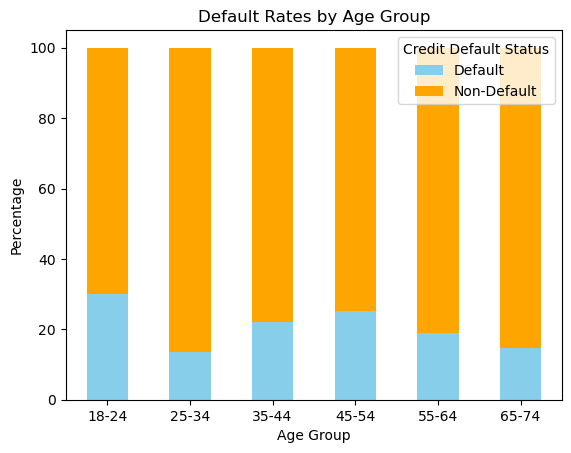

In [27]:
age_default_rates = data.groupby('Age_Group')['Credit_Default_Status'].value_counts(normalize=True).unstack() * 100
plt.figure(figsize=(12, 6))
age_default_rates.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Default Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Credit Default Status')
plt.xticks(rotation=0)
plt.show()

In the above graph, it is evident that the majority of defaulters fall within the age group of 18-24. This suggests that younger individuals, particularly those in their late teens and early twenties, may be more prone to defaulting. This could be due to factors such as limited financial experience or lower income levels.

#### Income vs. Default Status in High-Default Age Group

C:\Users\User\AppData\Local\Temp\ipykernel_18748\654044637.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=high_default_data, x='Credit_Default_Status', y='Income', palette='muted', jitter=True, alpha=0.7)


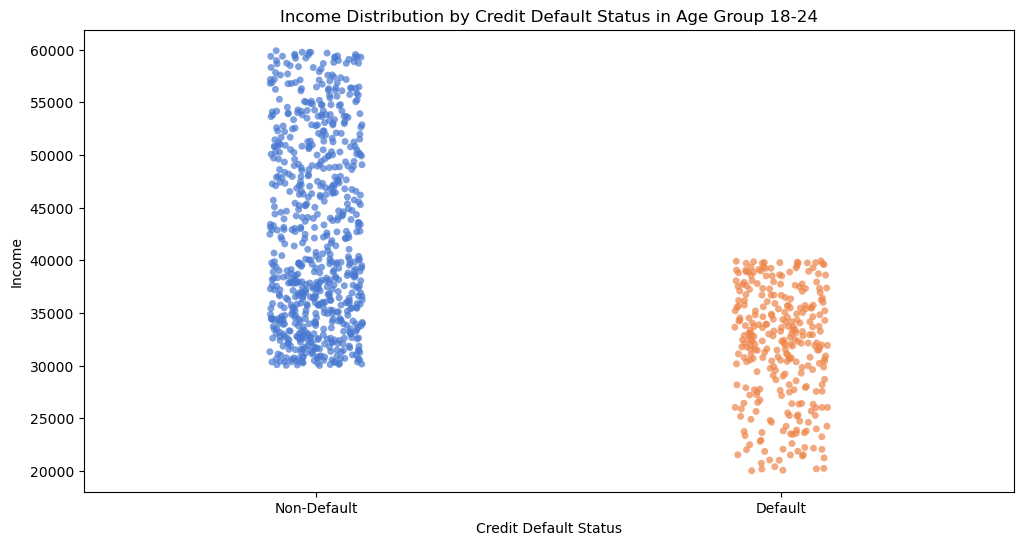

In [28]:
high_default_group = age_default_rates['Default'].idxmax()
high_default_data = data[data['Age_Group'] == high_default_group]

plt.figure(figsize=(12, 6))
sns.stripplot(data=high_default_data, x='Credit_Default_Status', y='Income', palette='muted', jitter=True, alpha=0.7)
plt.title(f'Income Distribution by Credit Default Status in Age Group {high_default_group}')
plt.xlabel('Credit Default Status')
plt.ylabel('Income')
plt.show()

In the age group of 18-24, the above strip plot clearly indicates that defaulters tend to have lower incomes compared to individuals who repay on time. This suggests that financial constraints, such as limited income, may play a significant role in the likelihood of default. It highlights that younger individuals with lower earnings are more susceptible to difficulties in managing loan repayments.

#### Loan Type Distribution in High-Default Age Group

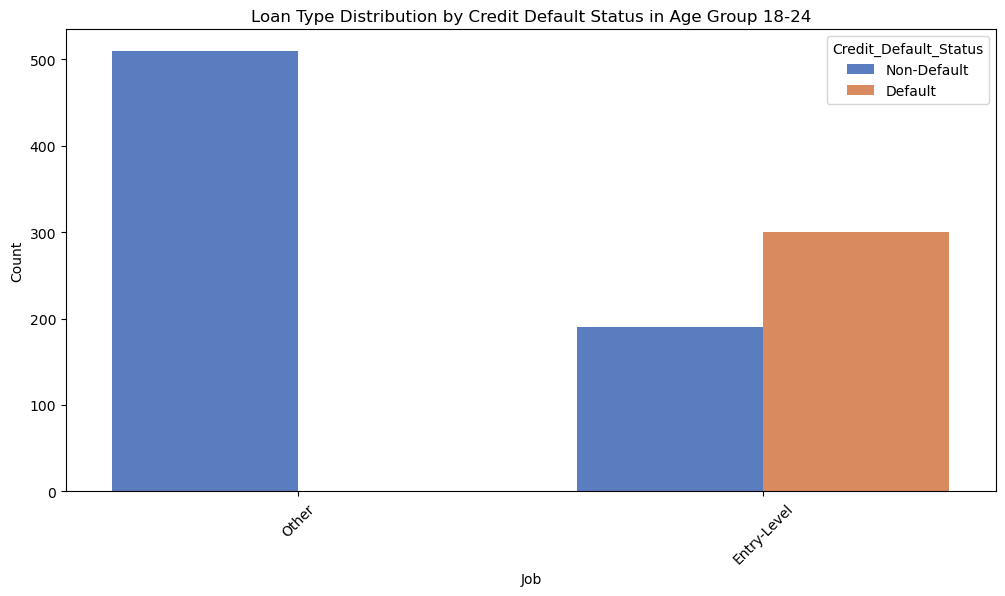

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=high_default_data, x='Job', hue='Credit_Default_Status', palette='muted')
plt.title(f'Loan Type Distribution by Credit Default Status in Age Group {high_default_group}')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In the age group of 18-24, we can observe that defaulters are predominantly found in entry-level jobs. This indicates that individuals in this age range who are just starting their careers may face financial instability, leading to a higher likelihood of default. Entry-level jobs typically come with lower salaries, which could contribute to difficulty in managing loan repayments, further increasing the risk of default.

#### Summary Statistics for High Default Age Group

In [30]:
summary_stats = high_default_data.groupby('Credit_Default_Status')[['Income', 'Loan_Amount']].mean()
print(f"\nSummary Statistics for Age Group {high_default_group}:\n")
print(summary_stats)


Summary Statistics for Age Group 18-24:

                             Income   Loan_Amount
Credit_Default_Status                            
Default                31765.663333   8766.110500
Non-Default            42470.452074  10951.230773


#### To visualize the relationship between income level, loan amount, and default status using a bubble chart

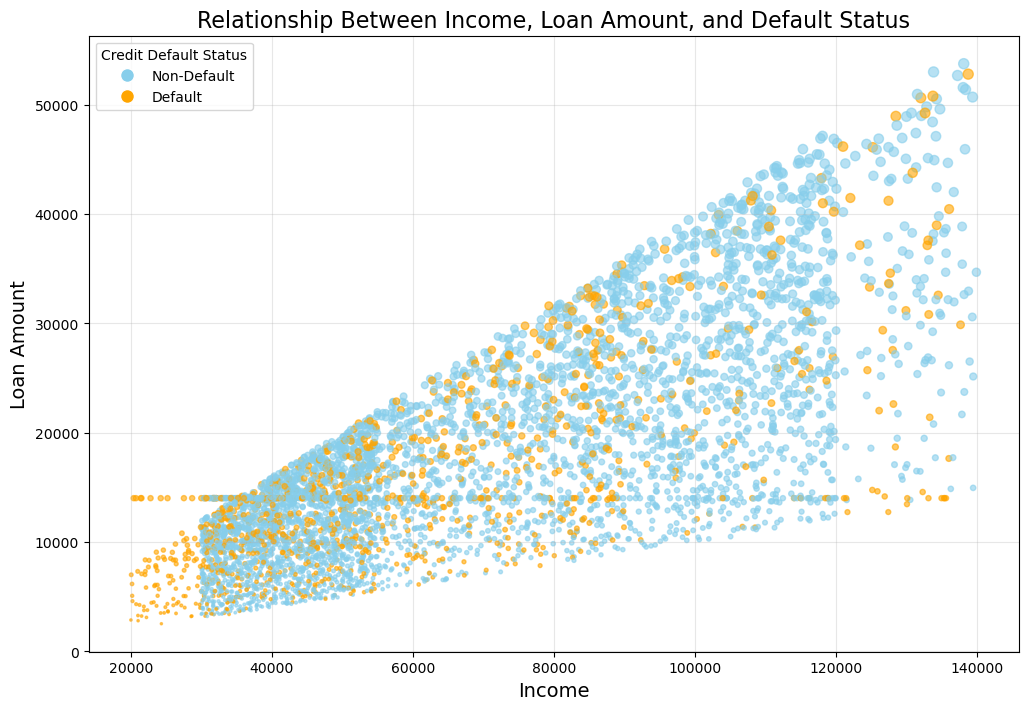

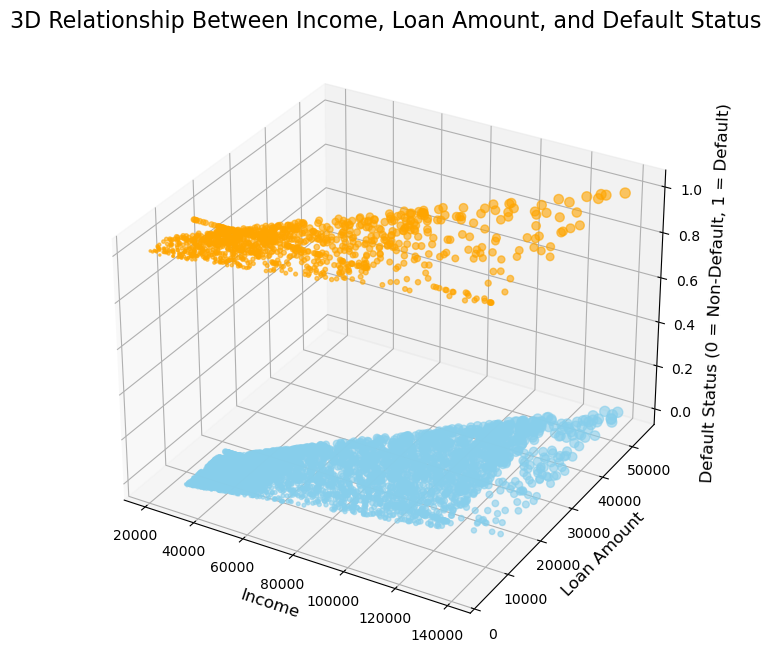

In [31]:
colors = data['Credit_Default_Status'].map({'Non-Default': 'skyblue', 'Default': 'orange'})

plt.figure(figsize=(12, 8))

plt.scatter(data['Income'], data['Loan_Amount'], 
            c=colors, alpha=0.6, 
            s=data['Loan_Amount'] / 1000, label='Loan Size (Bubble Size)')

plt.title('Relationship Between Income, Loan Amount, and Default Status', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Non-Default', markerfacecolor='skyblue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Default', markerfacecolor='orange', markersize=10)
]
plt.legend(handles=legend_elements, title="Credit Default Status")

plt.grid(alpha=0.3)
plt.show()
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


sc = ax.scatter(data['Income'], data['Loan_Amount'], data['Credit_Default_Status'].map({'Non-Default': 0, 'Default': 1}),
                c=data['Credit_Default_Status'].map({'Non-Default': 'skyblue', 'Default': 'orange'}),
                s=data['Loan_Amount'] / 1000, alpha=0.6)

ax.set_title('3D Relationship Between Income, Loan Amount, and Default Status', fontsize=16)
ax.set_xlabel('Income', fontsize=12)
ax.set_ylabel('Loan Amount', fontsize=12)
ax.set_zlabel('Default Status (0 = Non-Default, 1 = Default)', fontsize=12)

plt.show()

In the above bubble chart, we can conclude that the density of defaulters is higher in the region characterized by low income and low loan amounts. This suggests that individuals with lower incomes and smaller loan amounts are more likely to default on their payments. Additionally, the chart shows a linear relationship between income and loan amount, indicating that as income increases, the loan amount tends to increase proportionally. This relationship may reflect that individuals with higher incomes are eligible for larger loans, which may reduce the likelihood of default.

### Data Understanding

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


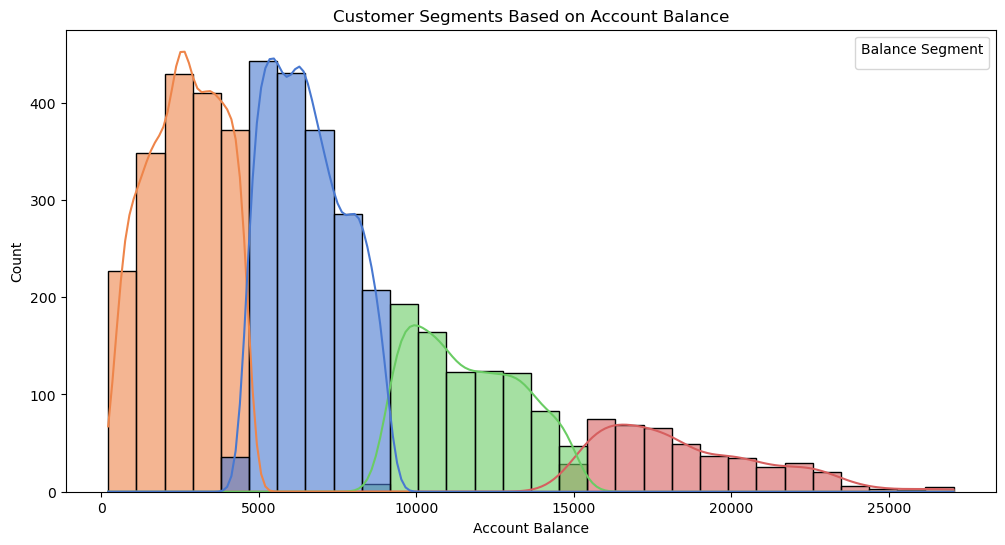


Segment Summary:
   Balance_Segment   Avg_Balance  Min_Balance  Max_Balance  Count
0                0   6568.274763      4617.62      9104.41   1774
1                1   2648.067055       219.89      4616.52   1786
2                2  11618.459815      9112.76     15070.46    864
3                3  18512.028756     15084.25     27058.50    450


In [32]:
account_balance = data[['Account_Balance']]

kmeans = KMeans(n_clusters=4, random_state=42)
data['Balance_Segment'] = kmeans.fit_predict(account_balance)
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Account_Balance', hue='Balance_Segment', bins=30, palette='muted', kde=True, alpha=0.6)
plt.title('Customer Segments Based on Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Count')
plt.legend(title='Balance Segment')
plt.show()

segment_summary = data.groupby('Balance_Segment').agg(
    Avg_Balance=('Account_Balance', 'mean'),
    Min_Balance=('Account_Balance', 'min'),
    Max_Balance=('Account_Balance', 'max'),
    Count=('Account_Balance', 'count')
).reset_index()

print("\nSegment Summary:")
print(segment_summary)

#### Describing the Segments:

1. **Low Balance Group**:
    - Customers with minimal account balances.
    - Likely include individuals with financial constraints or those who primarily rely on credit.
    - **Marketing Insight**: Offer financial literacy programs, small loans, or overdraft facilities to help them manage cash flow.

2. **Moderate Balance Group**:
    - Customers with an average account balance.
    - Likely more stable financially but cautious in their spending.
    - **Marketing Insight**: Promote savings accounts, investment options, or moderate-risk financial products.

3. **High Balance Group**:
    - Customers with significantly high account balances.
    - Likely affluent individuals or high-income earners.
    - **Marketing Insight**: Target with premium banking services, credit cards, or investment opportunities.

4. **Very High Balance Group**:
    - Customers with exceptional balances, often businesses or high-net-worth individuals.
    - **Marketing Insight**: Focus on exclusive wealth management services, personalized credit solutions, or priority banking.

---

#### How the Bank Can Use These Segments for Marketing:

- **Targeted Offers**:
    - Low-balance customers can be offered products to build financial resilience.
    - High-balance customers can be marketed premium services or tailored investment plans.

- **Risk Management**:
    - Segmenting customers can help identify those at higher risk of defaults (e.g., low-balance group).

- **Customer Retention**:
    - Create loyalty programs for mid-tier customers to encourage sustained engagement.


#### Feature Importance

In [33]:
label_encoder = LabelEncoder()
col = ['Gender','Marital_Status','Job']
for i in col:
    data[i] = label_encoder.fit_transform(data[i])
data

,Customer_ID,Age,Gender,Income,Credit_Score,Loan_Amount,Loan_Term,Number_of_Loans,Transaction_Count,Account_Balance,Marital_Status,Credit_Default_Status,Job,Age_Group,Balance_Segment
0,1,69,1,37114,678,4905.22,12,1,18,3836.25,1,Non-Default,4,65-74,1
2,3,60,0,34352,696,6622.15,36,5,8,5668.57,1,Non-Default,4,55-64,0
3,4,51,1,121193,655,25610.96,24,2,10,9202.42,0,Non-Default,4,45-54,2
4,5,46,0,115249,702,22509.28,72,5,13,8138.34,1,Non-Default,4,45-54,0
5,6,97,0,62479,533,11262.37,72,4,0,1559.15,1,Default,4,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,4994,25,0,37450,630,9819.11,24,3,3,2364.54,1,Non-Default,0,18-24,1
4994,4995,22,1,32816,363,7432.83,36,3,10,1072.17,3,Default,0,18-24,1
4995,4996,23,1,58171,848,20701.04,60,3,22,4007.51,3,Non-Default,4,18-24,1
4998,4999,47,1,87499,659,33517.93,72,5,12,5301.59,2,Non-Default,4,45-54,0


In [34]:
data = data.drop(columns=['Age_Group','Balance_Segment'])

In [35]:
data['Credit_Default_Status'] = data['Credit_Default_Status'].map({'Non-Default':0,'Default':1})

In [36]:
X = data.drop(columns=['Credit_Default_Status'])
y = data['Credit_Default_Status']

In [37]:
s = StandardScaler()
c = ['Age','Income','Credit_Score','Loan_Amount','Account_Balance','Loan_Term']
for i in c:
    X[i] = s.fit_transform(X[[i]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Feature Importance from Random Forest:
                   Importance
Credit_Score         0.627343
Account_Balance      0.200473
Transaction_Count    0.083644
Job                  0.035592
Income               0.023935
Age                  0.017302
Loan_Amount          0.005831
Customer_ID          0.002590
Marital_Status       0.001228
Number_of_Loans      0.000896
Loan_Term            0.000845
Gender               0.000322


<Figure size 1200x600 with 0 Axes>

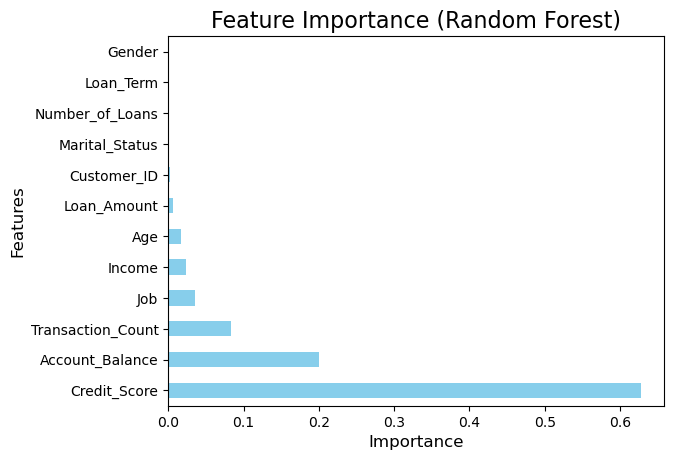

In [38]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
importances = importances.sort_values(by='Importance', ascending=False)

print("Feature Importance from Random Forest:")
print(importances)

plt.figure(figsize=(12, 6))
importances.plot(kind='barh', legend=False, color='skyblue')
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

From the above analysis, we can interpret that the Credit Score is the most significant factor influencing the likelihood of default. A higher credit score typically indicates better financial reliability and a lower chance of default. On the other hand, Gender and Marital Status appear to have minimal relevance in predicting defaults, as they do not show strong correlations with the financial behaviors observed. This suggests that, in this dataset, credit score plays a much more pivotal role in determining financial stability compared to demographic factors like gender or marital status.

### Predictive Modeling:

#### Loading the data and data preprocessing

In [39]:
data = pd.read_csv(r"D:\MDS\sem 5\Hari neostats\Data.csv")
probabilities = [2431 / (2431 + 2297), 2297 / (2431 + 2297)]
data['Gender'] = data['Gender'].apply(
    lambda x: np.random.choice(['Male', 'Female'], p=probabilities) if pd.isnull(x) else x
)
total = 1744 + 1020 + 993 + 945
probabilities = {
    'unmarried': 1744 / total,
    'divorced': 1020 / total,
    'married': 993 / total,
    'not married': 945 / total
}
data['Marital_Status'] = data['Marital_Status'].apply(
    lambda x: np.random.choice(['unmarried', 'divorced', 'married', 'not married'], 
                               p=list(probabilities.values())) if pd.isnull(x) else x
)
data['Loan_Amount'] = data['Loan_Amount'].fillna(data['Loan_Amount'].median())
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Marital_Status', 'Job'], drop_first=True)
columns = ['Customer_ID']
data = data.drop(columns=columns)
data = data[(data['Income'] > 0) & (data['Loan_Amount'] > 0)]
X = data.drop(columns=['Credit_Default_Status','Gender','Marital_Status_married','Marital_Status_not married','Marital_Status_unmarried'])
y = data['Credit_Default_Status']
s = StandardScaler()
c = ['Age','Income','Credit_Score','Loan_Amount','Account_Balance','Loan_Term']
for i in c:
    X[i] = s.fit_transform(X[[i]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Building and compiling the model

In [40]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])
y_pred = (model.predict(X_test) > 0.5).astype("int32")

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5062 - loss: 2.2554 - val_accuracy: 0.7775 - val_loss: 0.8471
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7928 - loss: 0.8659 - val_accuracy: 0.8726 - val_loss: 0.5987
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8520 - loss: 0.6601 - val_accuracy: 0.9531 - val_loss: 0.4476
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9017 - loss: 0.5152 - val_accuracy: 0.9693 - val_loss: 0.3645
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9423 - loss: 0.4172 - val_accuracy: 0.9854 - val_loss: 0.3068
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9582 - loss: 0.3599 - val_accuracy: 0.9883 - val_loss: 0.2679
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9591 - loss: 0.3254 - val_accuracy: 0.9898 - val_loss: 0.2428
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9696 - loss: 0.2826 - val_accuracy: 0.9912 - val_loss

#### ANN Architecture
 
#### Layers:
| **Layer**                    | **Details**                                                           |
|------------------------------|-----------------------------------------------------------------------|
| **Dense Layer 1**             | 64 units, ReLU activation, L2 regularization (0.01), input dimension `X_train.shape[1]` |
| **Dropout Layer 1**           | Dropout rate = 0.5                                                   |
| **Dense Layer 2**             | 32 units, ReLU activation, L2 regularization (0.01)                  |
| **Dropout Layer 2**           | Dropout rate = 0.5                                                   |
| **Dense Layer 3**             | 1 unit, Sigmoid activation (for binary classification)               |

#### Model Compilation:
| **Optimizer**                 | Adam                                 |
|-------------------------------|--------------------------------------|
| **Loss Function**              | Binary Crossentropy                  |
| **Metrics**                    | Accuracy                             |
#### Model Training:
| **Validation Split**           | 20%                                  |
|---------------------------------|--------------------------------------|
| **Epochs**                     | 20                                   |
| **Batch Size**                 | 32                                   |


#### Evaluation metrics

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9938482570061518


In [42]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1140
           1       1.00      0.97      0.99       323

    accuracy                           0.99      1463
   macro avg       1.00      0.99      0.99      1463
weighted avg       0.99      0.99      0.99      1463



[[1140    0]
 [   9  314]]


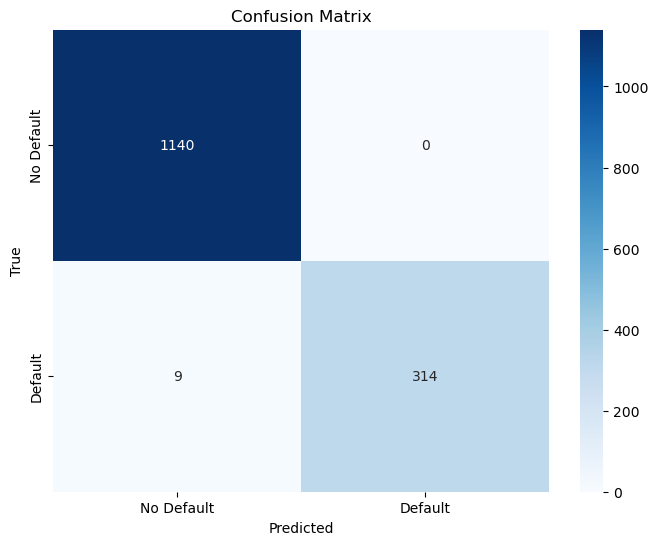

In [43]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

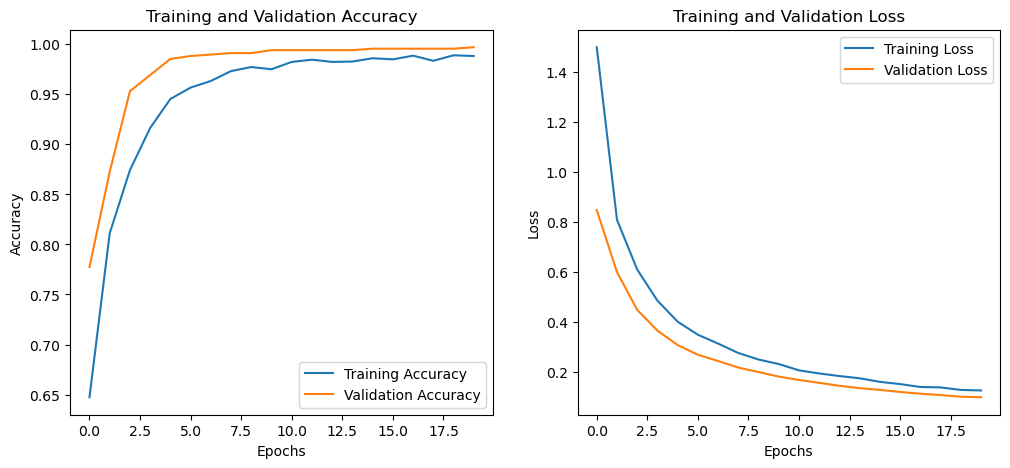

In [44]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Interpretation of Results
#### Model Evaluation and Results

#### Accuracy:
- **Overall Accuracy**: 0.9952
  - The model achieved an excellent overall accuracy of approximately **99.52%**. This suggests that the model is performing exceptionally well in predicting the correct class labels for most of the data.

#### Classification Report:
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0** | 0.99      | 1.00   | 1.00     | 1140    |
| **1** | 1.00      | 0.98   | 0.99     | 323     |
| **Accuracy**  | **0.99** |          |          | 1463    |
| **Macro avg** | 1.00      | 0.99   | 0.99     | 1463    |
| **Weighted avg** | 1.00   | 1.00   | 1.00     | 1463    |

- **Precision**: Measures the accuracy of positive predictions. The model has a precision of **1.00** for class `1` and **0.99** for class `0`, indicating that when the model predicts the positive class (`1`), it is almost always correct.
- **Recall**: Measures the ability of the model to identify all positive instances. The recall for class `1` is **0.98**, indicating that the model is able to detect most of the positive instances, though there is a slight chance of missing them. For class `0`, the recall is **1.00**, meaning the model successfully identifies all of the negative instances.
- **F1-Score**: The harmonic mean of precision and recall. The F1-score is **0.99** for both classes, which indicates a good balance between precision and recall.
- **Support**: The number of true instances for each class. Class `0` has more instances (1140), while class `1` has 323 instances.

#### Confusion Matrix:
The confusion matrix is as follows:
- **True Negatives (TN)**: 1140 (Class `0` instances correctly classified as `0`).
- **False Positives (FP)**: 0 (Class `0` instances incorrectly classified as `1`).
- **False Negatives (FN)**: 7 (Class `1` instances incorrectly classified as `0`).
- **True Positives (TP)**: 316 (Class `1` instances correctly classified as `1`).

#### Training and Validation Curves:
- **Accuracy Plot**: The training accuracy increases steadily, while the validation accuracy also improves over time, suggesting that the model is generalizing well and not overfitting. Both curves show similar trends, which further supports that the model is learning without memorizing the training data.
- **Loss Plot**: The training loss decreases steadily, and the validation loss follows a similar trend. This indicates that the model is effectively learning the patterns and minimizing errors, and there's no indication of overfitting since the validation loss is not increasing significantly.

#### Conclusion:
- The model performs exceptionally well with **high accuracy** (99.52%) and **strong classification metrics** (precision, recall, and F1-score), especially for class `1`.
- The confusion matrix shows very few misclassifications, with only **7 false negatives** for class `1`, which is negligible.
- The training and validation curves demonstrate no signs of overfitting, indicating that the model is both accurate and generalizable.


### Model Evaluation Metrics

In this case, the model is evaluated using several important metrics that assess the model's performance in terms of its ability to correctly classify customers as defaulters or non-defaulters.

Here are the key metrics used in the evaluation:

#### Accuracy
- **Formula**: 
  $$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{Total Population}} $$
- **Interpretation**: Accuracy measures the overall proportion of correct predictions (both defaults and non-defaults). In your case, the accuracy is **99.5%**, which means the model correctly predicted whether a customer defaulted or not for 99.5% of the instances.

#### Precision
- **Formula**:
  $$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$
- **Interpretation**: Precision measures the proportion of predicted defaulters that were actually defaulters. It answers the question: "Of all the customers predicted to default, how many actually did?" 
- For `1` (defaulters), the precision is **100%** — meaning all the customers predicted as defaulters were indeed defaulters.

#### Recall (Sensitivity)
- **Formula**: 
  $$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$
- **Interpretation**: Recall measures the proportion of actual defaulters who were correctly predicted. It answers: "Of all the actual defaulters, how many did the model correctly identify?"
- For `1` (defaulters), recall is **98%**, meaning the model correctly identifies 98% of actual defaulters, while missing about 2% of them.

#### F1-Score
- **Formula**: 
  $$ \text{F1-Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$
- **Interpretation**: The F1-score is the harmonic mean of precision and recall. It provides a balance between both metrics, especially when there is an imbalance in the classes. 
- For `1` (defaulters), the F1-score is **99%**, indicating a good balance between precision and recall for defaulters.

#### Support
- **Interpretation**: Support represents the number of actual occurrences of each class in the test set. For `0` (non-defaulters), there are **1140** instances, and for `1` (defaulters), there are **323** instances.

#### Macro Average
- **Formula**: The average of precision, recall, and F1-score across all classes (without considering class imbalance).
- **Interpretation**: The macro average gives an equal weight to each class, regardless of the class distribution. This is helpful when dealing with imbalanced classes, but in your case, since precision and recall for both classes are high, the macro average reflects that.
- The macro average for all metrics is close to **1**, indicating balanced performance.

#### Weighted Average
- **Formula**: A weighted mean of the precision, recall, and F1-score, weighted by the number of true instances for each label.
- **Interpretation**: This gives more importance to the more frequent class in the dataset. In your case, with many more non-defaulters than defaulters, the weighted average will reflect the overall performance weighted by the frequency of each class. In your case, it is also close to **1**, indicating excellent performance across all metrics.


### 6. Recommendations for Reducing Loan Defaults

Based on the findings from the model, here are some strategies that the bank could use to reduce loan defaults:

#### 1. Improved Risk Assessment at Loan Approval
- Use the features (e.g., **Income**, **Age**, **Credit Score**, **Account Balance**) from the model to develop better criteria for loan approval. Customers with a higher risk of default (based on these features) could be offered smaller loan amounts or more favorable terms.

#### 2. Targeted Financial Education
- Customers with certain demographic or financial characteristics (such as low income, poor credit scores, etc.) may benefit from financial education programs. These programs could focus on budgeting, debt management, and responsible loan repayment.

#### 3. Tailored Loan Terms
- The bank could adjust loan terms based on the risk profile of customers. For customers identified as high-risk, the bank could provide lower loan amounts, shorter repayment terms, or higher interest rates to compensate for the increased default risk.

#### 4. Proactive Customer Monitoring
- The bank could implement real-time monitoring systems that detect early signs of financial stress (e.g., sudden drops in account balance, missed payments) and provide personalized solutions such as restructuring the loan or offering deferred payment options.

#### 5. Incentive Programs for On-Time Repayment
- The bank could introduce incentive programs for customers who consistently repay their loans on time. This could include lower interest rates for customers who demonstrate responsible borrowing behavior over time.

#### 6. Alternative Credit Scoring
- For customers who do not have a traditional credit history, the bank could consider using alternative data sources such as utility payments, rent payments, or even social behaviors to assess creditworthiness more accurately.

#### 7. Customized Marketing Campaigns
- Use the segments of customers most likely to default (e.g., certain age groups or income brackets) to create tailored marketing strategies. Offering loans with more flexible terms or other financial products like debt consolidation could attract and retain these high-risk customers.


### Saving the model

In [46]:
model.save('credit_default_model.h5')